In [1]:
#Se carga Módulo de Vector Field Plot
import vectorfieldplot.vfp as vfp
#Se carga función para visualizar el archivo en formato svg
from IPython.display import SVG
#Se cargan funciones para la interactividad
from ipywidgets import interactive
from IPython.display import display

# Monopolo

El campo eléctrico que una carga puntual $q^{\prime}$ ubicada en la posición $\vec{r}^{\,\prime}$, genera en la posición $\vec{r}$ está dado por:

$$\vec{E}(\vec{r}) = \frac{k_{e} q^{\prime}}{||\vec{r}-\vec{r}^{\,\prime}||^3} (\vec{r}-\vec{r}^{\,\prime}),$$

donde $k_{e}$ es la constante eléctrica cuyo valor en el SI es $k_{e} \approx 8.99\times 10^{9}~\text{Nm}^2\text{C}^{-2}.$

## ¿Cómo elaborar una imagen?

### 1. Se crea el archivo y se configura el campo eléctrico

In [2]:
#Si quiere rehacer la imagen debe volver a ejecutar desde esta celda en adelante
doc = 1
del doc
#Se crea documento donde se dibujará las líneas de campo eléctrico
name = 'monopolo_electrico'
doc = vfp.FieldplotDocument(name, commons=True,center=[300,300],width=600,height=600)
#Se configura el campo eléctrico
field = vfp.Field([['monopole', {'x':0, 'y':0, 'Q':1}]])
#Se dibujan las cargas que generan el campo
doc.draw_charges(field)

### 2. Se itera para dibujar cada una de las líneas de campo eléctrico

In [3]:
#Se configura el número de líneas de campo Eléctrico
n = 2
#Se itera para dibujar las líneas de campo eléctrico
for i in range(n):
    a = 2.0 * vfp.pi * (0.5 + i) / n
    line = vfp.FieldLine(field, [0, 0], start_v=[vfp.cos(a), vfp.sin(a)], directions='forward', maxr=5)
    doc.draw_line(line, linewidth=1.0, arrows_style={'dist':2, 'scale':2,
        'max_arrows':1, 'offsets':[1.0, 0.5, 0.5, 0.5],
        'fixed_ends':[True, False, False, False]})

('integration boundary', '5', 'exceeded at', '  0.00000,  5.37082')
('integration boundary', '5', 'exceeded at', ' -0.00000, -5.12361')


### 3. Se exporta el archivo en formato svg

In [4]:
#Se guarda archivo en formato svg
doc.write()

('image written to', 'monopolo_electrico.svg')


In [5]:
# Verifique que se ha exportado el archivo name+'.svg'
%ls

animacion_dipolo_electrico_ideal.svg  dipolo-ideal.ipynb
animacion_dipolo_electrico.svg        dipolo.ipynb
dipolo_electrico_ideal.svg            monopolo_electrico.svg
dipolo_electrico.svg                  monopolo.ipynb


### 4. Se carga y visualiza el archivo en formato svg

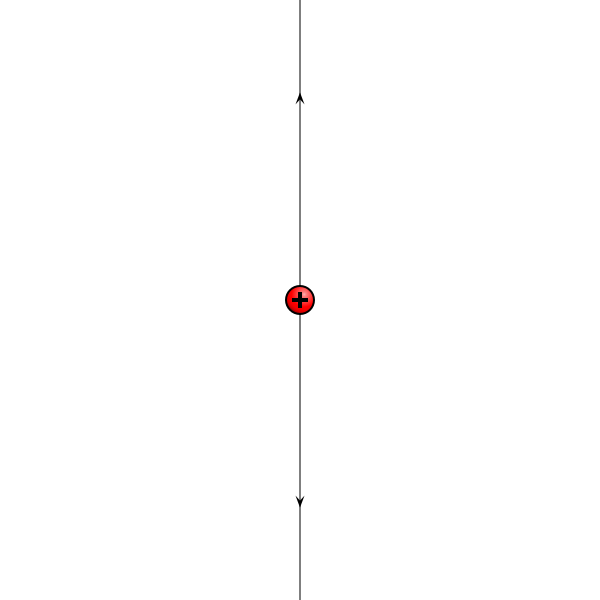

In [6]:
#Se visualiza el archivo
display(SVG(filename=name+'.svg'))

# Animación Interactiva

In [7]:
name = 'animacion_monopolo_electrico'
def no_interactive(x0=0, y0=0, Q=1, n=0):
    doc = 1
    del doc
    #Se genera el arhivo en el que se trabajará
    doc = vfp.FieldplotDocument(name, commons=True,center=[300,300],width=700,height=600,unit=100)
    #Se configura el campo eléctrico
    field = vfp.Field([['monopole', {'x':x0, 'y':y0, 'Q':Q}]])
    #Se dibujan las cargas que generan el campo eléctrico
    doc.draw_charges(field) 
    #Se itera para dibujar cada una de las líneas de campo
    for i in range(n):
        a = 2.0 * vfp.pi * (0.5 + i) / n
        line = vfp.FieldLine(field, [x0, y0], start_v=[vfp.cos(a), vfp.sin(a)], directions='both', maxr=5)
        doc.draw_line(line, linewidth=1.0, arrows_style={'dist':2, 'scale':2,
            'max_arrows':1, 'offsets':[1.0, 0.5, 0.5, 0.5],
            'fixed_ends':[True, False, False, False]})
    #Se guarda el archivo en formato svg
    doc.write()
    #Se visualiza el archivo
    display(SVG(filename=name+'.svg'))

(1000, 'integration steps exceeded at', '  0.00000,  0.00000')
('integration boundary', '5', 'exceeded at', ' -5.37082,  0.00000')
('image written to', 'animacion_monopolo_electrico.svg')


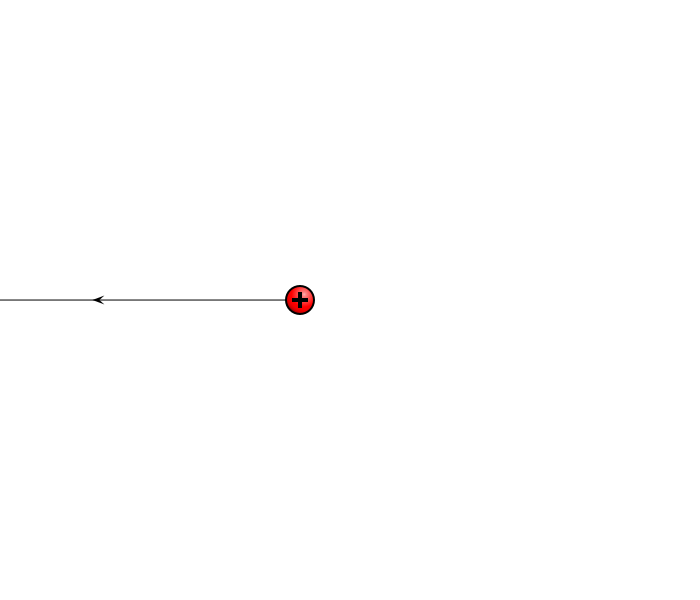

In [8]:
display(interactive(no_interactive,
                    x0 = (-10,10,0.5), y0 = (-10,10,0.5), Q = (-10,10,0.5), n = (1,40,1)))